In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY1_2023-Copy1.csv")
df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,10-01-2023 20:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,10-01-2023 20:15,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,10-01-2023 20:30,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,10-01-2023 20:45,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,10-01-2023 21:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,12-06-2023 20:15,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,12-06-2023 20:30,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,12-06-2023 20:45,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,12-06-2023 21:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [4]:
df2.isnull().sum()

Datetime       0
id          4460
field1      4460
field2      4460
field3      4460
field4      4460
field5      4460
field6      4460
field7      4460
field8      4460
dtype: int64

In [5]:
df2.fillna(method = 'bfill', inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
testl = 24*7
trainl = len(df2) - testl
df3 = df2.set_index('Datetime')

df_train = df3[:trainl]
df_test = df3[trainl-24:trainl+testl]

In [8]:
targets = ['field1','field2','field3','field4','field7','field8']
covariates = ['field5','field6']

X_train_df = df_train[covariates]
Y_train_df = df_train[targets]

X_test_df = df_test[covariates]
Y_test_df = df_test[targets]

In [9]:
X_train = TimeSeries.from_dataframe(X_train_df)
Y_train = TimeSeries.from_dataframe(Y_train_df)

X_test = TimeSeries.from_dataframe(X_test_df)
Y_test = TimeSeries.from_dataframe(Y_test_df)

In [10]:
from darts.models import RandomForest
import warnings
warnings.filterwarnings("ignore")

n = len(Y_test)

# Initialize the Random Forest
modelrf = RandomForest(lags=24, lags_past_covariates=24, output_chunk_length=24 )

# Train the model on the training data
modelrf.fit(Y_train, past_covariates=X_train)


RandomForest(lags=24, lags_past_covariates=24, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, n_estimators=100, max_depth=None, multi_models=True, use_static_covariates=True)

In [11]:
predrf1 = modelrf.predict(n, past_covariates = X_test)

predictions = TimeSeries.pd_dataframe(predrf1)
predictions

component,field1,field2,field3,field4,field7,field8
Datetime,,,,,,
2023-11-29 22:00:00,23.190985,32.035928,514.796748,0.000000,24.816667,26.833333
2023-11-29 23:00:00,23.190985,32.035928,514.796748,0.000000,24.816667,26.833333
2023-11-30 00:00:00,23.190985,32.035928,514.796748,0.000000,24.816667,26.833333
2023-11-30 01:00:00,23.190985,32.035928,514.796748,0.000000,24.816667,26.833333
2023-11-30 02:00:00,23.190985,32.035928,514.796748,0.000000,24.816667,26.833333
...,...,...,...,...,...,...
2023-12-07 17:00:00,20.292700,28.633766,628.804205,11.964069,19.701644,21.824165
2023-12-07 18:00:00,20.404474,27.933790,734.998374,13.767742,20.058285,22.172441
2023-12-07 19:00:00,20.456286,27.735219,793.550502,12.987756,19.221638,21.165133


In [12]:
from darts.metrics import rmse, mae, mape
import numpy as np

# Convert actual and predicted values to TimeSeries
actual_series_list = [TimeSeries.from_dataframe(Y_test_df[[target]]) for target in targets]
predicted_series_list = [TimeSeries.from_dataframe(predictions[[target]]) for target in targets]

# Calculate RMSE and MAE for each target field
rmse_values = []
mae_values = []
mape_values = []

for actual, predicted in zip(actual_series_list, predicted_series_list):
    rmse_value = rmse(actual, predicted)
    mae_value = mae(actual, predicted)
    
    # Handling MAPE calculation with a small constant added to actual values
    epsilon = 1e-6  # Small constant to avoid division by zero
    actual_positive = actual + epsilon  # Adding epsilon to actual values
    
    mape_value = mape(actual_positive, predicted)
    
    rmse_values.append(rmse_value)
    mae_values.append(mae_value)
    mape_values.append(mape_value)

# Create a DataFrame to store the results for LightGBM
results_df = pd.DataFrame({
    'Field': targets,
    'RMSE_LightGBM': rmse_values,
    'MAE_LightGBM': mae_values,
    'MAPE_LightGBM': mape_values
})

# Save the LightGBM results to a CSV file
results_df.to_csv('RandomForest_multi_results_2.csv', index=False)


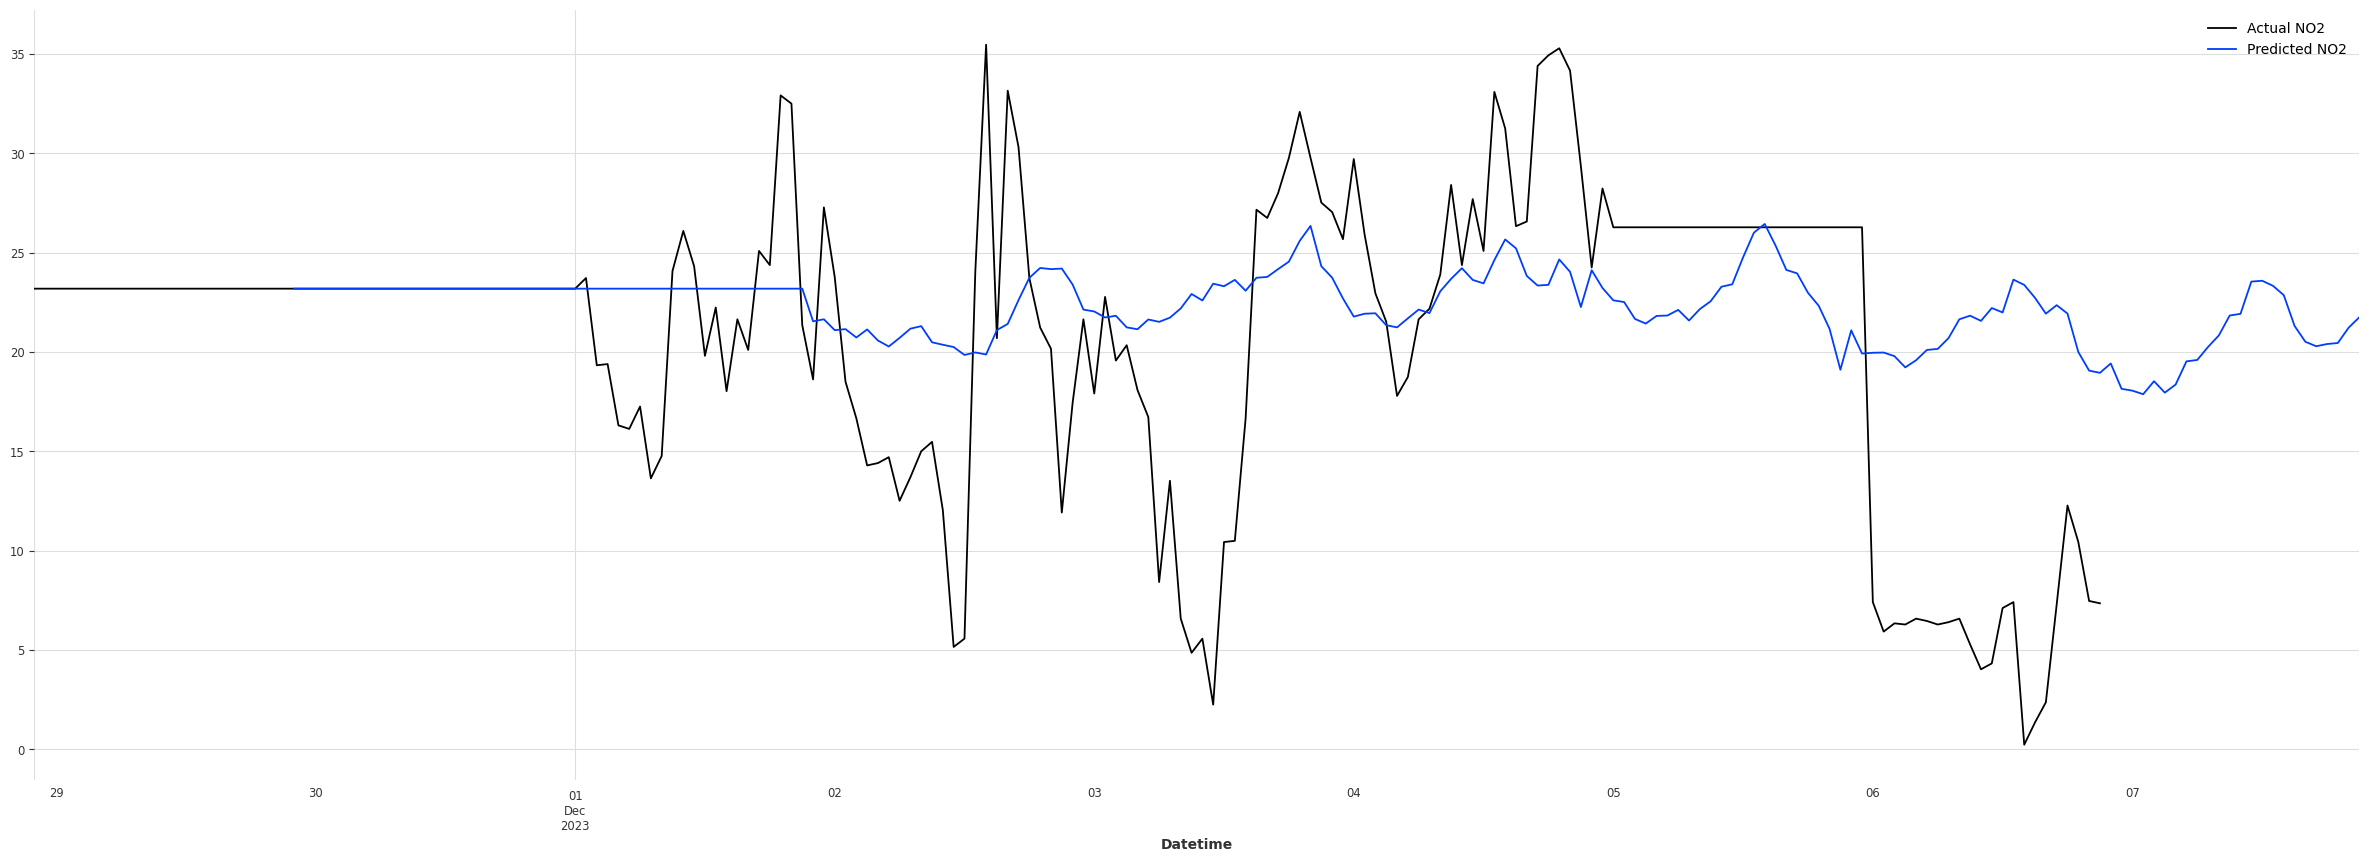

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
Y_test_df['field1'].plot(label='Actual NO2')
predictions['field1'].plot(label='Predicted NO2')
plt.legend()
plt.show()

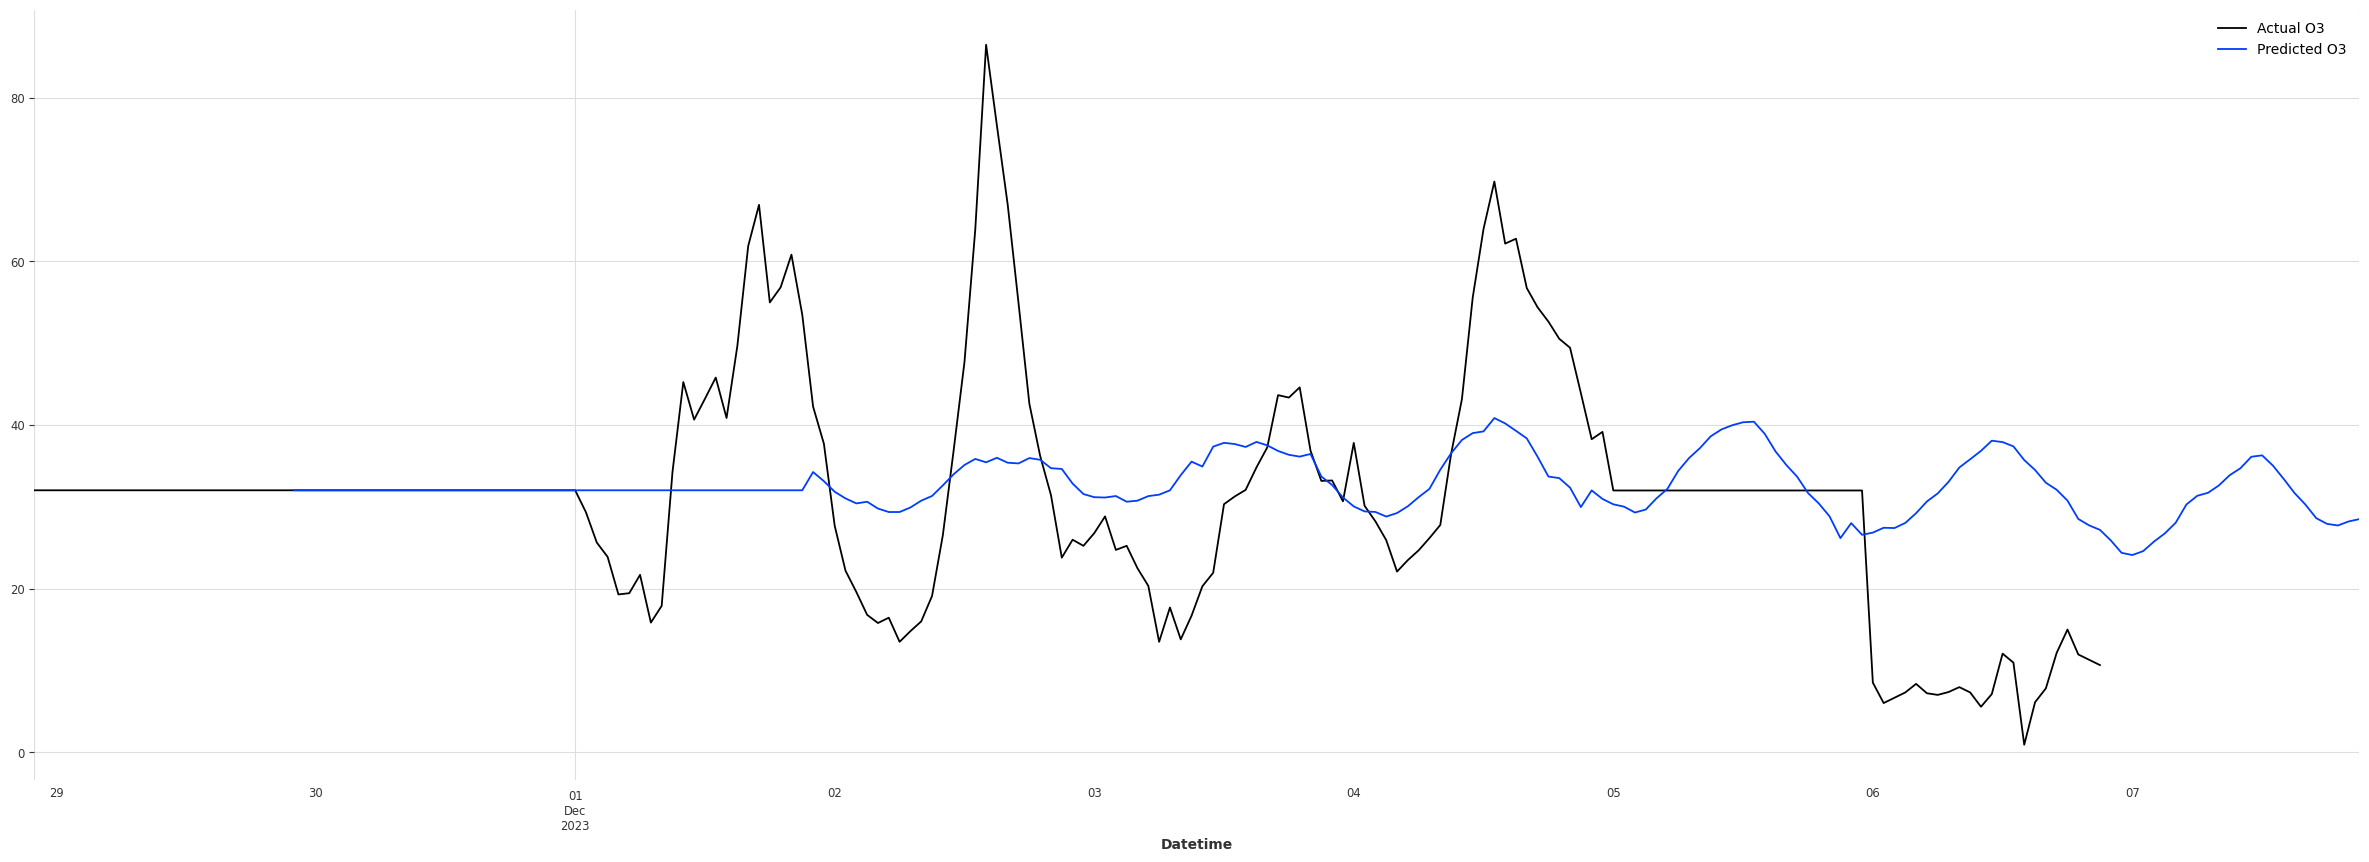

In [14]:
plt.figure(figsize=(30,10))
Y_test_df['field2'].plot(label='Actual O3')
predictions['field2'].plot(label='Predicted O3')
plt.legend()
plt.show()

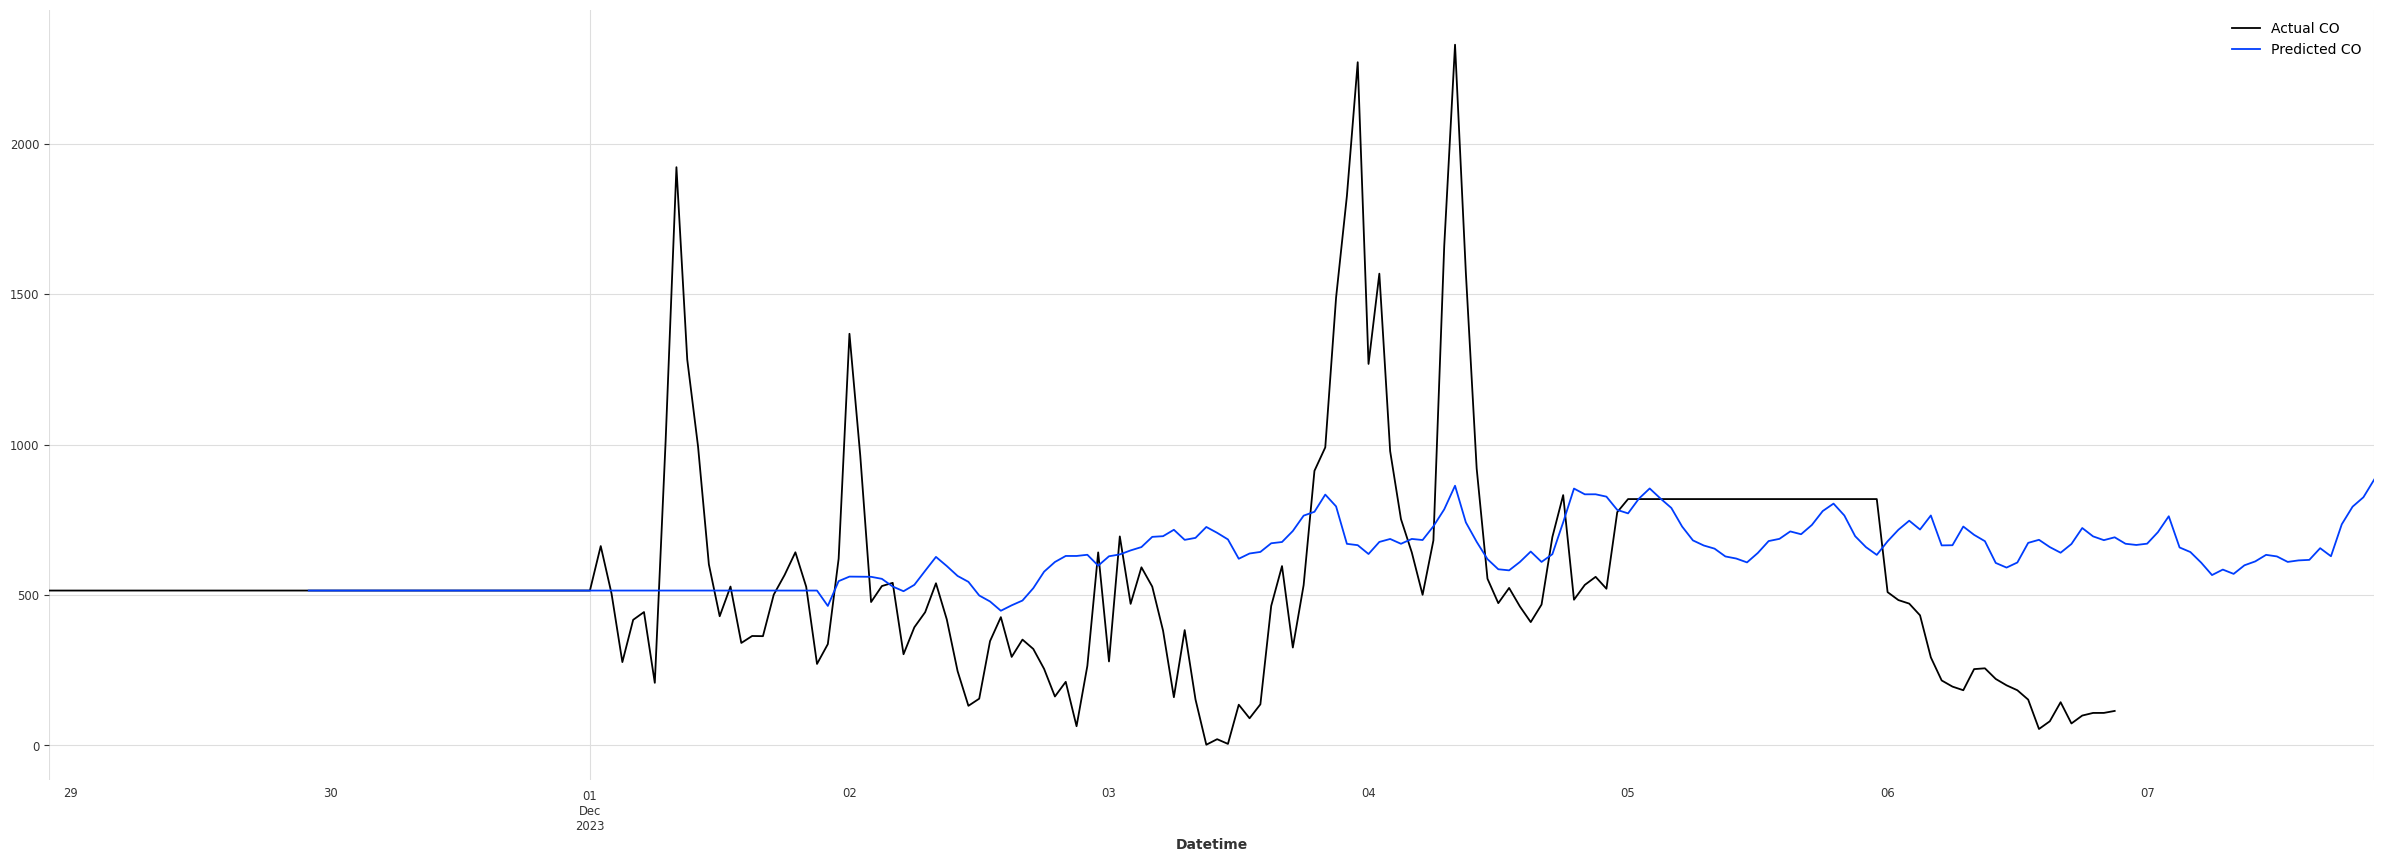

In [15]:
plt.figure(figsize=(30,10))
Y_test_df['field3'].plot(label='Actual CO')
predictions['field3'].plot(label='Predicted CO')
plt.legend()
plt.show()

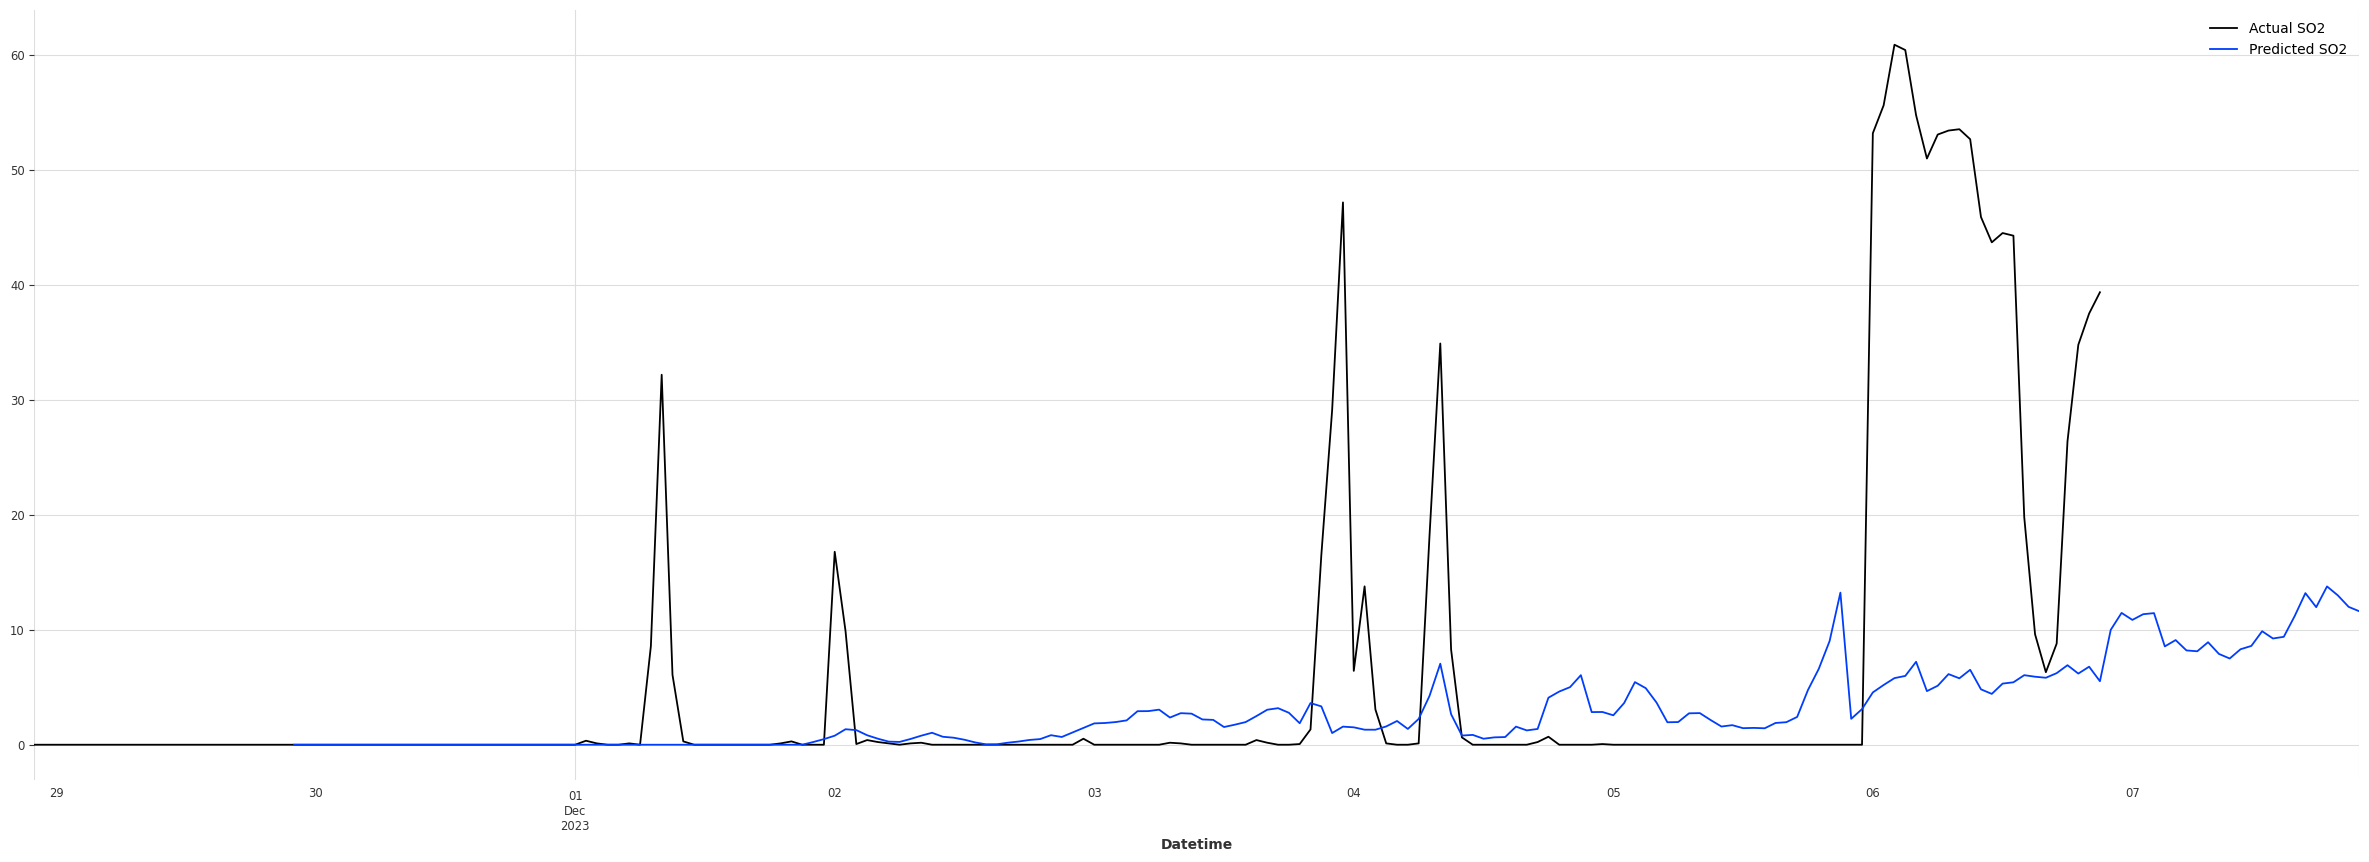

In [16]:
plt.figure(figsize=(30,10))
Y_test_df['field4'].plot(label='Actual SO2')
predictions['field4'].plot(label='Predicted SO2')
plt.legend()
plt.show()

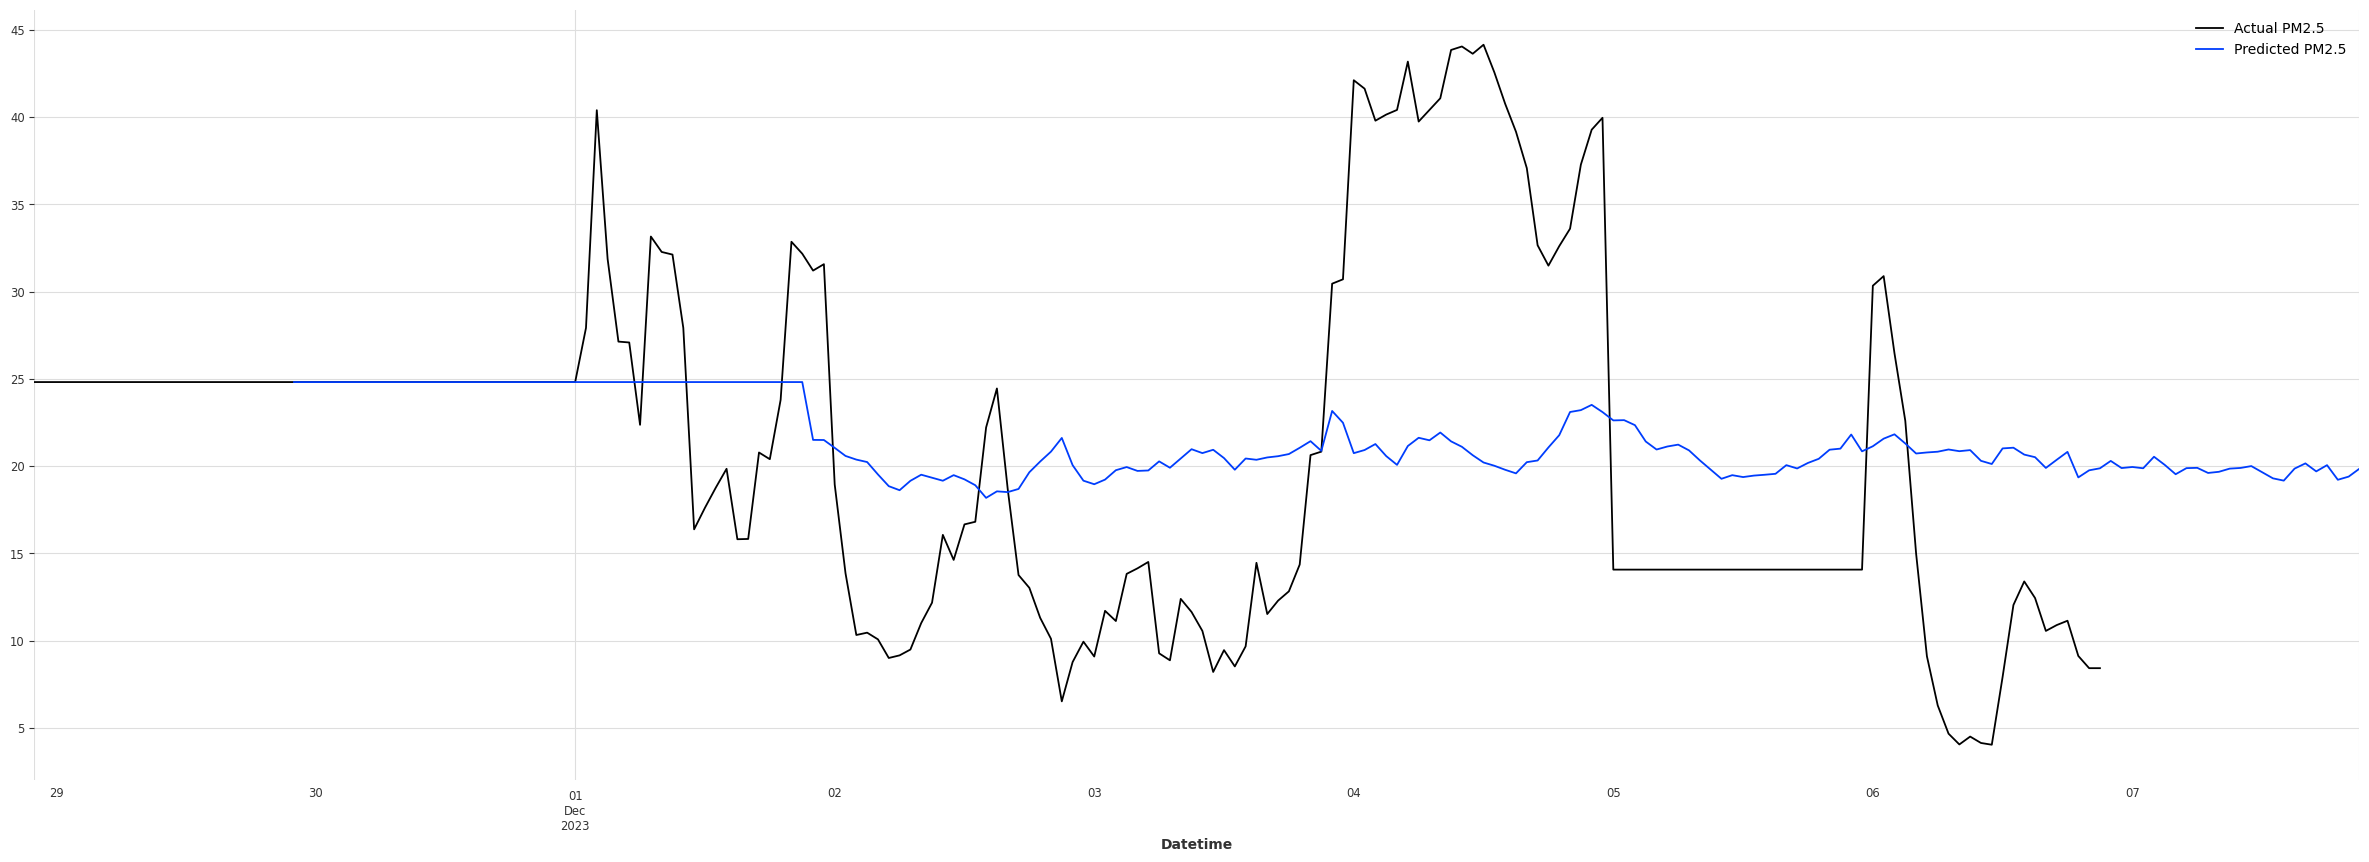

In [17]:
plt.figure(figsize=(30,10))
Y_test_df['field7'].plot(label='Actual PM2.5')
predictions['field7'].plot(label='Predicted PM2.5')
plt.legend()
plt.show()

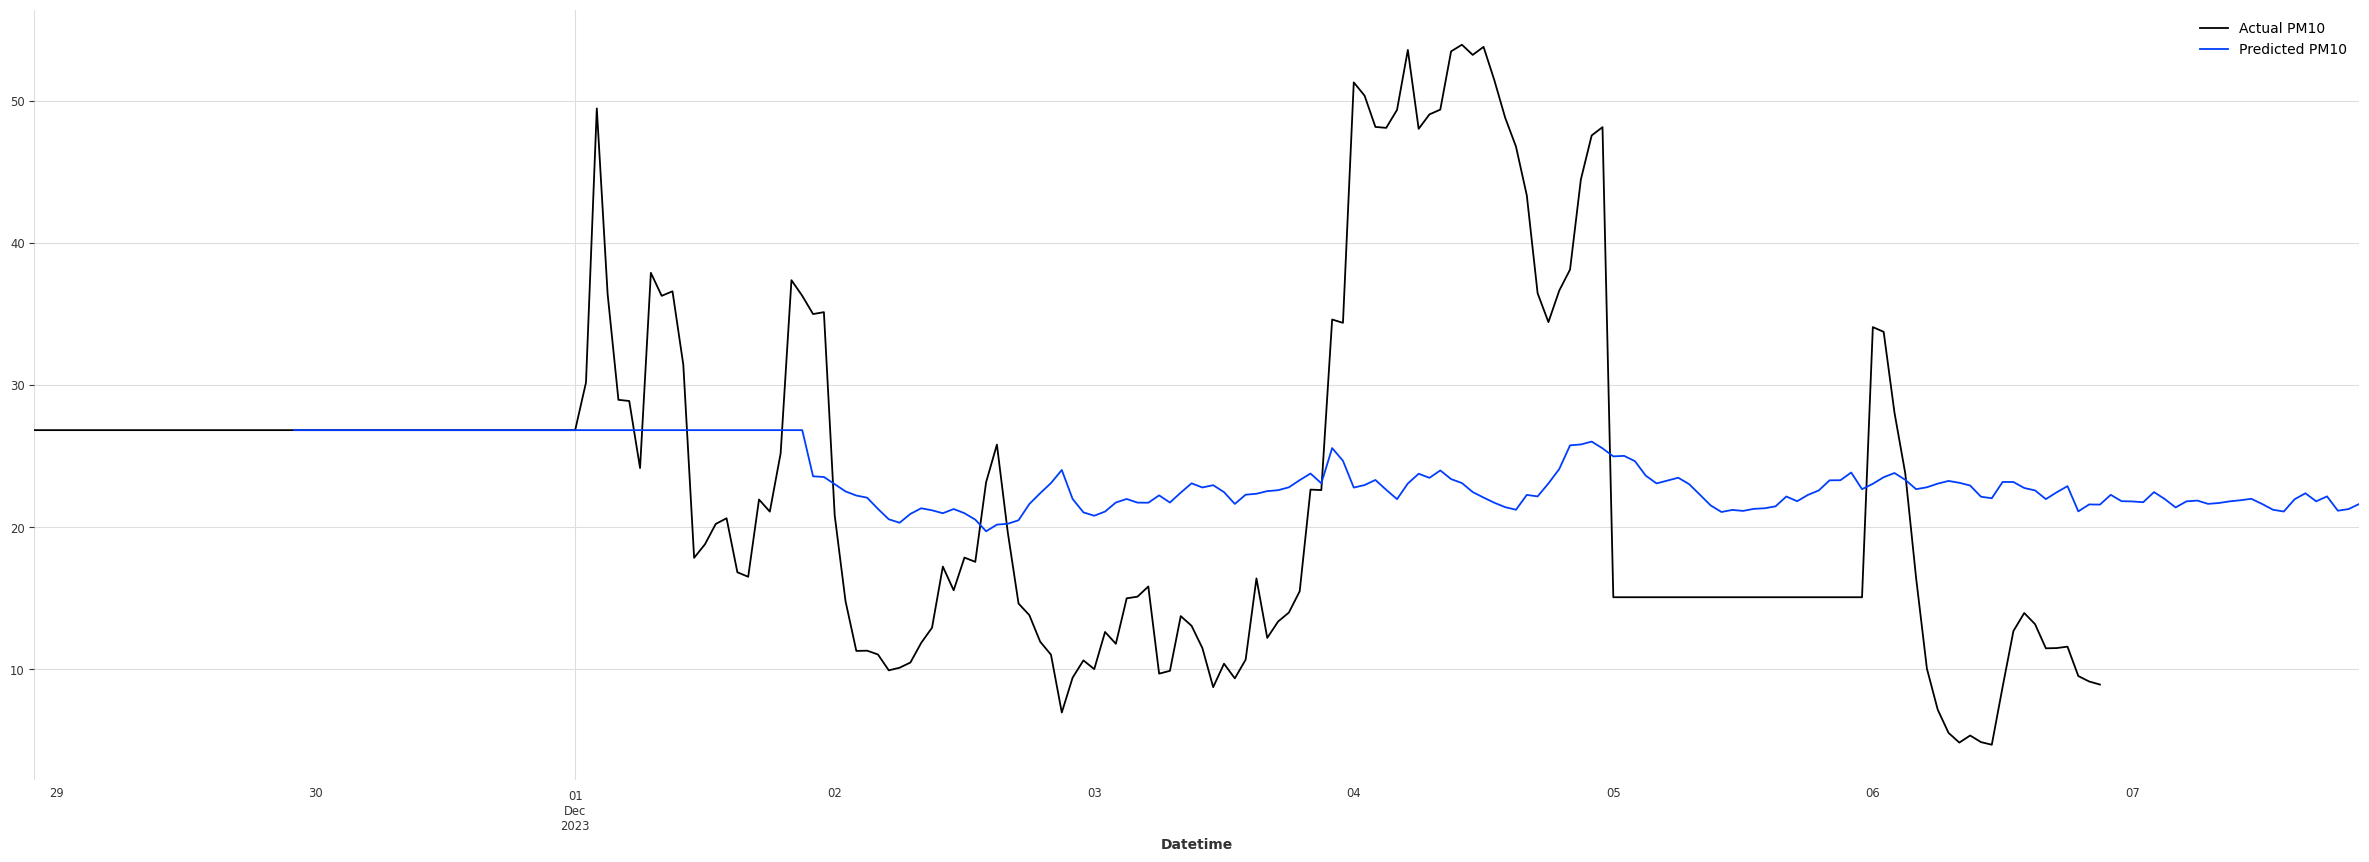

In [18]:
plt.figure(figsize=(30,10))
Y_test_df['field8'].plot(label='Actual PM10')
predictions['field8'].plot(label='Predicted PM10')
plt.legend()
plt.show()